<a href="https://colab.research.google.com/github/SiLiKhon/HEPStatsSeminar/blob/master/Overview_of_useful_Python_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview of useful Python libraries

# Numpy - multidimensional data arrays

The numpy package (module) is used in almost all numerical computation using Python. It is a package that provides high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good.

To use numpy you need to import the module, using for example:

In [0]:
import numpy as np # 'np' will be a simple alias for accessing numpy functions and classes

In the numpy package the main object used for vectors, matrices and higher-dimensional data sets is `ndarray` (the name stands for *n-dimensional array*).

## Creating numpy arrays


There are a number of ways to initialize new numpy arrays, for example from:
* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as arange, linspace, etc.
* reading data from files

### From lists

For example, to create new vector and matrix arrays from Python lists we can use the numpy.array function.

In [2]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])

v

array([1, 2, 3, 4])

In [3]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])

M

array([[1, 2],
       [3, 4]])

The v and M objects are both of the type ndarray that the numpy module provides.

In [4]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

The difference between the v and M arrays is only their shapes. We can get information about the shape of an array by using the ndarray.shape property.

In [5]:
v.shape

(4,)

In [6]:
M.shape

(2, 2)

The number of elements in the array is available through the ndarray.size property:

In [7]:
M.size

4

So far the numpy.ndarray looks awefully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type?

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are statically typed and homogeneous. The type of the elements is determined when the array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of numpy arrays can be implemented in a compiled language (C and Fortran is used).


Using the dtype (data type) property of an ndarray, we can see what type the data of an array has:

In [8]:
M.dtype

dtype('int64')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [9]:
M[0,0] = "hello"

ValueError: ignored

If we want, we can explicitly define the type of the array data when we create it, using the dtype keyword argument:

In [10]:
M = np.array([[1, 2], [3, 4]], dtype=complex)

M

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Common data types that can be used with dtype are: int, float, complex, bool, object, etc.

We can also explicitly define the bit size of the data types, for example: int64, int16, float128, complex128.

### Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in numpy that generate arrays of different forms. Some of the more common are:

**arange**

In [11]:
# create a range

x = np.arange(0, 10, 1) # arguments: start, stop, step

x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
x = np.arange(-1, 1, 0.1)

x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

**linspace** and **logspace**

In [13]:
# using linspace, both end points ARE included
np.linspace(0, 10, 25)

array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])

In [14]:
np.logspace(0, 9, 10, base=np.e) # the output is [e^0, e^1, e^2, ... e^9]

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

**random data**

In [15]:
# uniform random numbers in [0,1]
np.random.rand(5,5)

array([[0.20720934, 0.41449178, 0.29726535, 0.7657945 , 0.38253601],
       [0.52782951, 0.45495206, 0.32894365, 0.72668113, 0.42770758],
       [0.49535576, 0.0565168 , 0.93498627, 0.11370953, 0.53761742],
       [0.36926628, 0.18596588, 0.9483981 , 0.24981245, 0.32879162],
       [0.22838115, 0.92841333, 0.91651562, 0.34337267, 0.20247245]])

In [16]:
# standard normal distributed random numbers
np.random.normal(size=(3, 3))

array([[ 1.68805886e-02, -1.89966729e+00,  6.93873477e-01],
       [-4.21622406e-02, -1.11967534e-03, -3.75393981e-01],
       [ 1.58763225e+00, -2.62547656e-01, -3.89929111e-01]])

**zeros** and **ones**

In [17]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [18]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

# matplotlib - 2D and 3D plotting in Python

In [0]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline


Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI.
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* GUI for interactively exploring figures and support for headless generation of figure files (useful for batch jobs).

One of the key features of matplotlib that I would like to emphasize, and that I think makes matplotlib highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled programmatically. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance.

More information at the Matplotlib web page: [http://matplotlib.org/](http://matplotlib.org/)

To get started using Matplotlib in a Python program import the matplotlib.pyplot module under the name plt:


In [0]:
import matplotlib.pyplot as plt

There two ways of plotting in matplotlib: MATLAB-like and object-oriented.

**MATLAB-like:**

In [0]:
x = np.linspace(0, 5, 10)
y = x ** 2

Text(0.5,1,'title')

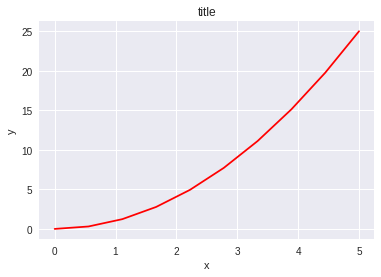

In [22]:
plt.figure()
plt.plot(x, y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('title')

**Object-oriented:**

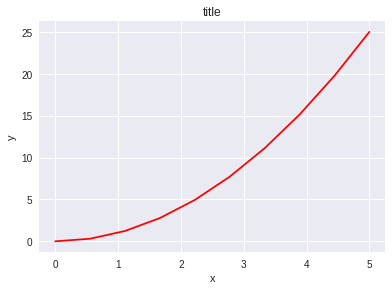

In [23]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:


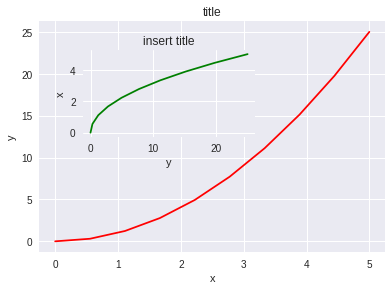

In [24]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

# pandas 
pandas is a library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Handling data with pd.DataFrame

The main object here is `pandas.DataFrame` – a 2d table of (possibly heterogeneous) data. There is a number a ways to create a `DataFrame`, but possibly one of the most common ways is to construct it by reading a text file of tabulated data with a specified delimiter (i.e. CSV files):

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/SiLiKhon/HEPStatsSeminar/master/data/moscow_weather.csv",
                 delimiter=';')
type(df)

pandas.core.frame.DataFrame

In [54]:
# Look at the first N (5 by default) rows of data:
df.head()

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
0,2018,11,4,0,0,7.03,0.6,14.76,257.32
1,2018,11,4,1,0,7.05,0.2,14.49,255.62
2,2018,11,4,2,0,7.04,0.0,14.35,252.47
3,2018,11,4,3,0,6.49,0.0,16.10,259.70
4,2018,11,4,4,0,6.25,0.0,17.29,267.61


Selecting rows:

In [107]:
# We'll select a few rows and store the result as an independent copy of the original data
small_df = df.loc[3:10].copy()
small_df

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
3,2018,11,4,3,0,6.49,0.0,16.10,259.70
4,2018,11,4,4,0,6.25,0.0,17.29,267.61
5,2018,11,4,5,0,6.16,0.0,17.28,271.19
6,2018,11,4,6,0,6.00,0.0,17.28,271.19
7,2018,11,4,7,0,5.97,0.0,18.36,270.00
8,2018,11,4,8,0,5.94,0.0,19.16,275.39
9,2018,11,4,9,0,6.12,0.0,19.91,282.53
10,2018,11,4,10,0,6.40,0.0,20.52,285.26


In [108]:
# note that small_df has index starting from 3:
small_df.index

RangeIndex(start=3, stop=11, step=1)

In [109]:
# Indexing with '.loc' uses that index, also it includes the last element of the slice:
small_df.loc[4:5]

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
4,2018,11,4,4,0,6.25,0.0,17.29,267.61
5,2018,11,4,5,0,6.16,0.0,17.28,271.19


In [110]:
# while using just [4:5] selects the row, which is 4'th from the beginning
# of current DataFrame (it's index is 7), and it excludes the last element
# of the slice:
small_df[4:5]

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
7,2018,11,4,7,0,5.97,0.0,18.36,270.0


In [111]:
# You can list the column names:
small_df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Temperature  [2 m above gnd]', 'Total Precipitation  [sfc]',
       'Wind Speed  [10 m above gnd]', 'Wind Direction  [10 m above gnd]'],
      dtype='object')

In [112]:
# And easily select them:
small_df['Temperature  [2 m above gnd]']

3     6.49
4     6.25
5     6.16
6     6.00
7     5.97
8     5.94
9     6.12
10    6.40
Name: Temperature  [2 m above gnd], dtype: float64

In [119]:
# or a group of columns (note the nested [] brackets):
small_df[['Hour', 'Temperature  [2 m above gnd]']]

,Hour,Temperature [2 m above gnd]
3,3,6.49
4,4,6.25
5,5,6.16
6,6,6.00
7,7,5.97
8,8,5.94
9,9,6.12
10,10,6.40


In [120]:
# You can even add new columns:
small_df['T_squared'] = small_df['Temperature  [2 m above gnd]']**2
small_df['T_squared']

3     42.1201
4     39.0625
5     37.9456
6     36.0000
7     35.6409
8     35.2836
9     37.4544
10    40.9600
Name: T_squared, dtype: float64

In [116]:
# You can select rows with boolean indices:
small_df[[False, True, False, False, False, False, False, False]]

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],T_squared
4,2018,11,4,4,0,6.25,0.0,17.29,267.61,39.0625


In [117]:
# Obviously, spelling out this list of True and False values is not very practical.
# However one can get such list from some selection, e.g.:
small_df['T_squared'] > 40.

3      True
4     False
5     False
6     False
7     False
8     False
9     False
10     True
Name: T_squared, dtype: bool

In [118]:
# and hence the selection can be done like this:
small_df[small_df['T_squared'] > 40.]

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],T_squared
3,2018,11,4,3,0,6.49,0.0,16.10,259.70,42.1201
10,2018,11,4,10,0,6.40,0.0,20.52,285.26,40.9600


# Additional materials

# SciPy - scientific algorithms for Python

The SciPy framework builds on top of the low-level NumPy framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Some of the topics that SciPy covers are:

* Special functions (scipy.special)
* Integration (scipy.integrate)
* Optimization (scipy.optimize)
* Interpolation (scipy.interpolate)
* Fourier Transforms (scipy.fftpack)
* Signal Processing (scipy.signal)
* Linear Algebra (scipy.linalg)
* Sparse Eigenvalue Problems (scipy.sparse)
* Statistics (scipy.stats)
* Multi-dimensional image processing (scipy.ndimage)
* File IO (scipy.io)

Each of these submodules provides a number of functions and classes that can be used to solve problems in their respective topics.

In this lecture we will look at how to use some of these subpackages.

To access the SciPy package in a Python program, we start by importing the scipy module.

In [0]:
import scipy

If we only need to use part of the SciPy framework we can selectively include only those modules we are interested in. For example, to include the linear algebra package under the name la, we can do:

In [0]:
import scipy.linalg as la

Note: there is  no performance difference between the two approaches of importing modules. The choice between one or the other then, should be based on coding style instead.

## Linear algebra

The linear algebra module contains a lot of matrix related functions, including linear equation solving, eigenvalue solvers, matrix functions (for example matrix-exponentiation), a number of different decompositions (SVD, LU, cholesky), etc.

Detailed documetation is available at: [http://docs.scipy.org/doc/scipy/reference/linalg.html](http://docs.scipy.org/doc/scipy/reference/linalg.html)

Here we will look at how to use some of these functions:

## Linear equation systems

Linear equation systems on the matrix form

$A x = b$

where $A$ is a matrix and $x,b$ are vectors can be solved like:


In [37]:
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])

from scipy import linalg
x = linalg.solve(A, b)

x

array([ 2., -2.,  9.])

In [0]:
# check
dot(A, x) - b

We can also do the same with

$A X = B$

where $A, B, X$ are matrices:


In [39]:
A = scipy.rand(3,3)
B = scipy.rand(3,3)

X = linalg.solve(A, B)

X

array([[ 1.16873326e+00,  7.17951462e-01,  9.61427451e-01],
       [ 5.30024666e-03,  1.23844125e+00,  1.06726557e-01],
       [-1.39727856e+00, -6.53317970e+00, -2.65651400e+00]])

## Statistics

The scipy.stats module contains a large number of statistical distributions, statistical functions and tests. For a complete documentation of its features, see [http://docs.scipy.org/doc/scipy/reference/stats.html](http://docs.scipy.org/doc/scipy/reference/stats.html).

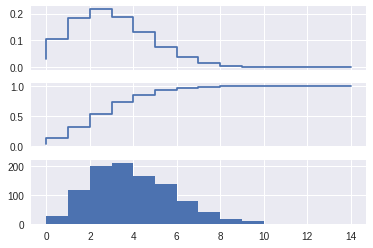

In [40]:
from scipy import stats

# create a (discreet) random variable with poissionian distribution
X = stats.poisson(3.5) # photon distribution for a coherent state with n=3.5 photons

n = np.arange(0,15)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability mass function (PMF)
axes[0].step(n, X.pmf(n))

# plot the commulative distribution function (CDF)
axes[1].step(n, X.cdf(n))

# plot histogram of 1000 random realizations of the stochastic variable X
axes[2].hist(X.rvs(size=1000));

## Statistical tests
Test if two sets of (independent) random data comes from the same distribution:

In [41]:
t_statistic, p_value = stats.ttest_ind(X.rvs(size=1000), X.rvs(size=1000))

print("t-statistic =", t_statistic)
print("p-value =", p_value)

t-statistic = -1.8242625219734867
p-value = 0.06826168283706106


Since the p value is very large we cannot reject the hypothesis that the two sets of random data have different means.

To test if the mean of a single sample of data has mean 0.1 (the true mean is 3.5):


In [42]:
stats.ttest_1samp(X.rvs(size=1000), 0.1)

Ttest_1sampResult(statistic=56.51227857703516, pvalue=2.0490612731e-313)

# More on Pandas

## Object Creation

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [27]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [28]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [29]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

df

,A,B,C,D
2013-01-01,-1.359722,-0.515774,1.396831,-0.064067
2013-01-02,1.215245,0.202695,-1.089379,0.307725
2013-01-03,0.489987,-0.385811,-0.764385,-2.183181
2013-01-04,0.680014,0.298680,-1.469834,-1.835706
2013-01-05,0.856720,0.281778,0.175882,1.163814
2013-01-06,-0.136092,-0.416611,2.446754,1.668228


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [121]:
df2 = pd.DataFrame({ 'A' : 1.,
	'B' : pd.Timestamp('20130102'),
	'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
	'D' : np.array([3] * 4,dtype='int32'),
	'E' : pd.Categorical(["test","train","test","train"]),
	'F' : 'foo' })

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [122]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [0]:
df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

Here is how to view the top and bottom rows of the frame:

In [123]:
df.head()

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
0,2018,11,4,0,0,7.03,0.6,14.76,257.32
1,2018,11,4,1,0,7.05,0.2,14.49,255.62
2,2018,11,4,2,0,7.04,0.0,14.35,252.47
3,2018,11,4,3,0,6.49,0.0,16.10,259.70
4,2018,11,4,4,0,6.25,0.0,17.29,267.61


In [124]:
df.tail(3)

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
189,2018,11,11,21,0,-3.60,0.0,21.61,119.98
190,2018,11,11,22,0,-3.85,0.0,21.87,122.91
191,2018,11,11,23,0,-4.04,0.0,21.68,125.54


Display the index, columns, and the underlying NumPy data:

In [125]:
df.index

RangeIndex(start=0, stop=192, step=1)

In [126]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Temperature  [2 m above gnd]', 'Total Precipitation  [sfc]',
       'Wind Speed  [10 m above gnd]', 'Wind Direction  [10 m above gnd]'],
      dtype='object')

In [127]:
df.values

array([[2.0180e+03, 1.1000e+01, 4.0000e+00, ..., 6.0000e-01, 1.4760e+01,
        2.5732e+02],
       [2.0180e+03, 1.1000e+01, 4.0000e+00, ..., 2.0000e-01, 1.4490e+01,
        2.5562e+02],
       [2.0180e+03, 1.1000e+01, 4.0000e+00, ..., 0.0000e+00, 1.4350e+01,
        2.5247e+02],
       ...,
       [2.0180e+03, 1.1000e+01, 1.1000e+01, ..., 0.0000e+00, 2.1610e+01,
        1.1998e+02],
       [2.0180e+03, 1.1000e+01, 1.1000e+01, ..., 0.0000e+00, 2.1870e+01,
        1.2291e+02],
       [2.0180e+03, 1.1000e+01, 1.1000e+01, ..., 0.0000e+00, 2.1680e+01,
        1.2554e+02]])

describe() shows a quick statistic summary of your data:

In [128]:
df.describe()

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
count,192.0,192.0,192.000000,192.000000,192.0,192.000000,192.000000,192.000000,192.000000
mean,2018.0,11.0,7.500000,11.500000,0.0,2.961406,0.004167,11.575833,189.998958
std,0.0,0.0,2.297278,6.940284,0.0,2.814121,0.045572,7.412555,84.645082
min,2018.0,11.0,4.000000,0.000000,0.0,-4.040000,0.000000,1.800000,35.540000
25%,2018.0,11.0,5.750000,5.750000,0.0,1.740000,0.000000,6.350000,99.112500
50%,2018.0,11.0,7.500000,11.500000,0.0,2.975000,0.000000,8.660000,218.985000
75%,2018.0,11.0,9.250000,17.250000,0.0,4.712500,0.000000,16.345000,270.297500
max,2018.0,11.0,11.000000,23.000000,0.0,9.330000,0.600000,30.120000,360.000000


# seaborn: statistical data visualization

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

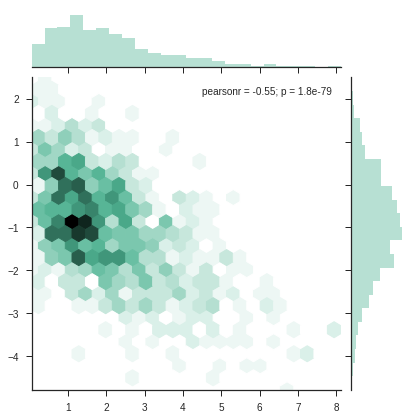

In [47]:
import numpy as np
import seaborn as sns
sns.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x, y, kind="hex", color="#4CB391")

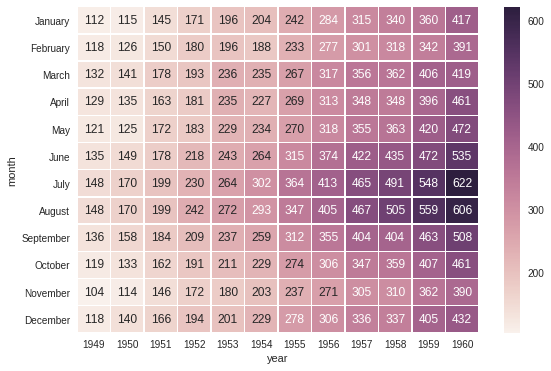

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)